# Visualizing model results
In this notebook, I go through model results and visualize them in a few different ways to make sense of them.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from libpysal.weights import Rook # For calculating spatial adjacency matrix.

In [2]:
bg = gpd.read_file('../results/by_block_group/model_results_2024_01_26.shp')
bg.head()

,geoid,income,area,population,num_statio,eve_avg,m1_temp,m2_temp,m3_temp,m4_temp,m5_temp,temp_f,trav_temp_,scm_temp,confound,no_unobs,counfound_,scm_temp_d,geometry
0,370630001011,68558.0,1888610.0,1240.0,1,28.700269,28.700269,28.700269,28.700269,28.700269,28.700269,79.244658,26.247032,26.242741,-0.813138,27.055879,-0.398611,26.641352,"POLYGON ((-78.89489 36.02991, -78.89343 36.030..."
1,370630001012,86699.0,1481712.0,2476.0,0,NaN,28.693938,28.953197,28.474340,28.620517,28.707428,78.637620,25.909789,25.724601,-1.009002,26.733603,-0.496682,26.221283,"POLYGON ((-78.89232 36.03489, -78.89154 36.035..."
2,370630001021,41250.0,1176041.0,1742.0,0,NaN,28.725618,28.882555,28.965955,28.993849,28.613690,NaN,NaN,25.932258,-1.373066,27.305325,-0.277743,26.210001,"POLYGON ((-78.91655 36.02532, -78.91635 36.025..."
3,370630001022,61538.0,726961.0,660.0,1,29.124863,29.124863,29.124863,29.124863,29.124863,29.124863,79.026076,26.125598,25.946321,-0.746686,26.693007,-0.330941,26.277262,"POLYGON ((-78.90229 36.02877, -78.90197 36.028..."
4,370630001023,44130.0,707011.0,644.0,0,NaN,28.787385,28.850908,29.049221,29.008120,28.625668,78.527578,25.848655,25.739972,-0.960751,26.700723,-0.281185,26.021157,"POLYGON ((-78.90554 36.02556, -78.90554 36.026..."


<Axes: >

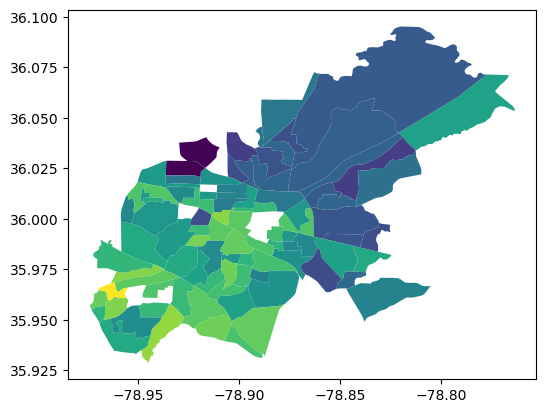

In [7]:
bg.plot(column='trav_temp_')

In [9]:
bg_city = bg[~bg['trav_temp_'].isna()]

In [12]:
bg_city[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']].corr()

,m1_temp,m2_temp,m3_temp,m4_temp,scm_temp,trav_temp_,no_unobs,scm_temp_d
m1_temp,1.000000,0.859142,0.690771,0.637229,-0.082794,-0.111317,0.159608,0.167446
m2_temp,0.859142,1.000000,0.755471,0.807217,0.002926,-0.045815,0.246930,0.280451
m3_temp,0.690771,0.755471,1.000000,0.973189,0.160961,0.105764,0.384075,0.400262
m4_temp,0.637229,0.807217,0.973189,1.000000,0.164363,0.106211,0.371222,0.403054
scm_temp,-0.082794,0.002926,0.160961,0.164363,1.000000,0.873109,0.752082,0.836605
trav_temp_,-0.111317,-0.045815,0.105764,0.106211,0.873109,1.000000,0.494563,0.741684
no_unobs,0.159608,0.246930,0.384075,0.371222,0.752082,0.494563,1.000000,0.811045
scm_temp_d,0.167446,0.280451,0.400262,0.403054,0.836605,0.741684,0.811045,1.000000


In [13]:
bg[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']].corr()

,m1_temp,m2_temp,m3_temp,m4_temp,scm_temp,trav_temp_,no_unobs,scm_temp_d
m1_temp,1.000000,0.950480,0.897124,0.883336,0.060826,-0.111317,0.256948,0.270781
m2_temp,0.950480,1.000000,0.895171,0.928586,0.095542,-0.045815,0.302644,0.316532
m3_temp,0.897124,0.895171,1.000000,0.985507,0.192640,0.105764,0.378355,0.373379
m4_temp,0.883336,0.928586,0.985507,1.000000,0.194512,0.106211,0.381928,0.380661
scm_temp,0.060826,0.095542,0.192640,0.194512,1.000000,0.873109,0.715253,0.696974
trav_temp_,-0.111317,-0.045815,0.105764,0.106211,0.873109,1.000000,0.494563,0.741684
no_unobs,0.256948,0.302644,0.378355,0.381928,0.715253,0.494563,1.000000,0.844661
scm_temp_d,0.270781,0.316532,0.373379,0.380661,0.696974,0.741684,0.844661,1.000000


In [21]:
w = Rook.from_dataframe(bg)
# Extract adjancency matrix from this weights object
adj = w.to_sparse().todense()
W = adj / np.sum(adj)

/var/folders/3r/mm1k6hx10zlgnb46j7vtvxz80000gq/T/ipykernel_59058/4224827921.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(bg)


In [22]:
bg_metrics = bg[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']]

# Normalize the metrics
bg_metrics = (bg_metrics - bg_metrics.mean()) / bg_metrics.std()

spat_corr = np.matmul(np.matmul(bg_metrics.values.T,W), bg_metrics.values)

for row, name in zip(spat_corr, bg_metrics.columns):
    print(name)
    for col, name in zip(row, bg_metrics.columns):
        print('\t', name, col)
        # print(col, end=' ')

m1_temp
	 m1_temp 0.32650121637966767
	 m2_temp 0.2770736896633797
	 m3_temp 0.31494601822897955
	 m4_temp 0.28808091771420696
	 scm_temp 0.013053020957745996
	 trav_temp_ nan
	 no_unobs 0.21704212981926524
	 scm_temp_d 0.20620717779088182
m2_temp
	 m1_temp 0.27707368966338003
	 m2_temp 0.26521763721775293
	 m3_temp 0.29877497470358744
	 m4_temp 0.28830119725184417
	 scm_temp 0.03115164543118482
	 trav_temp_ nan
	 no_unobs 0.22884512174792207
	 scm_temp_d 0.2272058663376361
m3_temp
	 m1_temp 0.31494601822897955
	 m2_temp 0.29877497470358744
	 m3_temp 0.3498668702282385
	 m4_temp 0.33158317245051844
	 scm_temp 0.11289111849809165
	 trav_temp_ nan
	 no_unobs 0.29932404361600506
	 scm_temp_d 0.28008184054358887
m4_temp
	 m1_temp 0.28808091771420696
	 m2_temp 0.2883011972518441
	 m3_temp 0.33158317245051855
	 m4_temp 0.32288373790811975
	 scm_temp 0.11000333600410467
	 trav_temp_ nan
	 no_unobs 0.29038981653779894
	 scm_temp_d 0.2793224716123461
scm_temp
	 m1_temp 0.013053020957745983
	 m2

# Census tract


In [23]:
ct = gpd.read_file('../results/by_census_tract/model_results_2024_01_29.shp')
ct.head()

,geoid,income,area,population,num_statio,eve_avg,m1_temp,m2_temp,m3_temp,m4_temp,m5_temp,temp_f,trav_temp_,scm_temp,confound,no_unobs,counfound_,scm_temp_d,geometry
0,37063000101,72382.0,3370322,3716,1,28.700269,28.700269,28.700269,28.700269,28.700269,28.700269,78.709675,25.949819,26.015177,-0.899160,26.914338,-0.441683,26.456861,"POLYGON ((-78.89489 36.02991, -78.89343 36.030..."
1,37063000102,51488.0,3998235,3702,2,29.108803,29.108803,29.108803,29.108803,29.108803,29.108803,78.593295,25.885164,26.032398,-1.058885,27.091283,-0.336193,26.368591,"POLYGON ((-78.91655 36.02532, -78.91635 36.025..."
2,37063000200,52375.0,3021171,3309,0,NaN,28.736127,28.940652,28.818427,30.320150,29.958625,80.489893,26.938829,26.700919,-0.411577,27.112496,-0.271472,26.972391,"POLYGON ((-78.90299 36.00574, -78.90253 36.006..."
3,37063000301,41750.0,1586355,2826,0,NaN,28.721609,28.900536,29.001929,30.960636,30.114185,81.086988,27.270549,26.968267,-0.535571,27.503838,-0.114608,27.082875,"POLYGON ((-78.91957 36.01043, -78.91949 36.011..."
4,37063000302,92500.0,1722150,3515,3,29.483394,29.483394,29.483394,29.483394,29.483394,29.483394,80.334883,26.852713,27.035484,-0.097179,27.132663,-0.122318,27.157801,"POLYGON ((-78.91246 36.00396, -78.91243 36.004..."


In [17]:
ct_city = ct[~ct['trav_temp_'].isna()]

In [18]:
ct_city[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']].corr()

,m1_temp,m2_temp,m3_temp,m4_temp,scm_temp,trav_temp_,no_unobs,scm_temp_d
m1_temp,1.000000,0.966535,0.948275,0.457919,0.134908,0.207788,0.302632,0.341281
m2_temp,0.966535,1.000000,0.977454,0.656805,0.244327,0.311777,0.400523,0.469310
m3_temp,0.948275,0.977454,1.000000,0.666718,0.206335,0.266133,0.370968,0.407092
m4_temp,0.457919,0.656805,0.666718,1.000000,0.442754,0.482740,0.512783,0.603917
scm_temp,0.134908,0.244327,0.206335,0.442754,1.000000,0.878568,0.741389,0.794871
trav_temp_,0.207788,0.311777,0.266133,0.482740,0.878568,1.000000,0.503165,0.663005
no_unobs,0.302632,0.400523,0.370968,0.512783,0.741389,0.503165,1.000000,0.852274
scm_temp_d,0.341281,0.469310,0.407092,0.603917,0.794871,0.663005,0.852274,1.000000


In [24]:
ct[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'm5_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']].corr()

,m1_temp,m2_temp,m3_temp,m4_temp,m5_temp,scm_temp,trav_temp_,no_unobs,scm_temp_d
m1_temp,1.000000,0.972578,0.963222,0.560445,0.694195,0.131542,0.207788,0.328366,0.355493
m2_temp,0.972578,1.000000,0.984252,0.729592,0.834680,0.213052,0.311777,0.420834,0.462051
m3_temp,0.963222,0.984252,1.000000,0.720823,0.794676,0.184556,0.266133,0.404413,0.425041
m4_temp,0.560445,0.729592,0.720823,1.000000,0.964491,0.365570,0.482740,0.543772,0.586866
m5_temp,0.694195,0.834680,0.794676,0.964491,1.000000,0.351821,0.494842,0.543805,0.609664
scm_temp,0.131542,0.213052,0.184556,0.365570,0.351821,1.000000,0.878568,0.715078,0.642193
trav_temp_,0.207788,0.311777,0.266133,0.482740,0.494842,0.878568,1.000000,0.503165,0.663005
no_unobs,0.328366,0.420834,0.404413,0.543772,0.543805,0.715078,0.503165,1.000000,0.871508
scm_temp_d,0.355493,0.462051,0.425041,0.586866,0.609664,0.642193,0.663005,0.871508,1.000000


In [25]:
w = Rook.from_dataframe(ct)
# Extract adjancency matrix from this weights object
adj = w.to_sparse().todense()
W = adj / np.sum(adj)

/var/folders/3r/mm1k6hx10zlgnb46j7vtvxz80000gq/T/ipykernel_59058/2102436392.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Rook.from_dataframe(ct)


In [26]:
bg_metrics = ct[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']]

# Normalize the metrics
bg_metrics = (bg_metrics - bg_metrics.mean()) / bg_metrics.std()

spat_corr = np.matmul(np.matmul(bg_metrics.values.T,W), bg_metrics.values)

for row, name in zip(spat_corr, bg_metrics.columns):
    print(name)
    for col, name in zip(row, bg_metrics.columns):
        print('\t', name, col)
        # print(col, end=' ')

m1_temp
	 m1_temp 0.08379447023787796
	 m2_temp 0.10723188924762624
	 m3_temp 0.10237270994646296
	 m4_temp 0.15797172668245715
	 scm_temp 0.06485949134349628
	 trav_temp_ nan
	 no_unobs 0.2170345810919499
	 scm_temp_d 0.22025585304194364
m2_temp
	 m1_temp 0.10723188924762618
	 m2_temp 0.14339258649976208
	 m3_temp 0.13679025032866915
	 m4_temp 0.21178716344129095
	 scm_temp 0.10962654510772508
	 trav_temp_ nan
	 no_unobs 0.2695982768870524
	 scm_temp_d 0.2789701350448106
m3_temp
	 m1_temp 0.10237270994646297
	 m2_temp 0.13679025032866915
	 m3_temp 0.13308861256845292
	 m4_temp 0.20300854478182062
	 scm_temp 0.08591069868648424
	 trav_temp_ nan
	 no_unobs 0.25120167507871655
	 scm_temp_d 0.24826112896222133
m4_temp
	 m1_temp 0.15797172668245707
	 m2_temp 0.21178716344129095
	 m3_temp 0.20300854478182057
	 m4_temp 0.28807823962241036
	 scm_temp 0.18565176305198672
	 trav_temp_ nan
	 no_unobs 0.31759310436249394
	 scm_temp_d 0.3237832230202123
scm_temp
	 m1_temp 0.06485949134349626
	 m2_

In [34]:
from scipy.stats import pearsonr

pearsonr(ct['m4_temp'], ct['scm_temp'])


for m in ['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp']:
    for s in ['scm_temp', 'no_unobs', 'scm_temp_d']:
        print(m, s, pearsonr(ct[m].values, ct[s].values))

# ct[['m1_temp', 'm2_temp', 'm3_temp', 'm4_temp', 'scm_temp', 'trav_temp_', 'no_unobs', 'scm_temp_d']]

m1_temp scm_temp PearsonRResult(statistic=0.1315423462432083, pvalue=0.30411399683681145)
m1_temp no_unobs PearsonRResult(statistic=0.3283661018650802, pvalue=0.008603413234529497)
m1_temp scm_temp_d PearsonRResult(statistic=0.3554926120664083, pvalue=0.004247554206912132)
m2_temp scm_temp PearsonRResult(statistic=0.21305238079503494, pvalue=0.09364104281006436)
m2_temp no_unobs PearsonRResult(statistic=0.4208338593222381, pvalue=0.0005939753364705025)
m2_temp scm_temp_d PearsonRResult(statistic=0.46205086405060813, pvalue=0.00013779599330384672)
m3_temp scm_temp PearsonRResult(statistic=0.18455631327594918, pvalue=0.1476148685157286)
m3_temp no_unobs PearsonRResult(statistic=0.40441266369150325, pvalue=0.001011566553195974)
m3_temp scm_temp_d PearsonRResult(statistic=0.4250413485213342, pvalue=0.0005159625956301388)
m4_temp scm_temp PearsonRResult(statistic=0.36556962805353593, pvalue=0.0032167747496784863)
m4_temp no_unobs PearsonRResult(statistic=0.5437720396596766, pvalue=4.1093833